In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

import seaborn as sns
from sklearn.metrics.pairwise import pairwise_kernels

In [194]:
local_date = '2016-02-24'

In [195]:
B = pd.read_parquet('./data/B_HKML.parquet')
B = B[B['date'] == local_date].drop('date', axis=1).to_numpy()
B.shape

(994, 85)

In [196]:
X_df = pd.read_parquet('./data/X_HKML.parquet')
X = X_df[X_df['date'] == local_date].drop('date', axis=1).to_numpy()
X.shape

(994, 160)

In [197]:
y_df = pd.read_parquet('./data/Y_HKML.parquet')
y = y_df.iloc[:len(X)].to_numpy().ravel()
y.shape

(994,)

In [198]:
C = 0.0
D = 100.0

In [199]:
K_linear = pairwise_kernels(X)

In [200]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(K_linear)
# plt.show()

In [201]:
K_rbf = pairwise_kernels(X, metric='rbf')

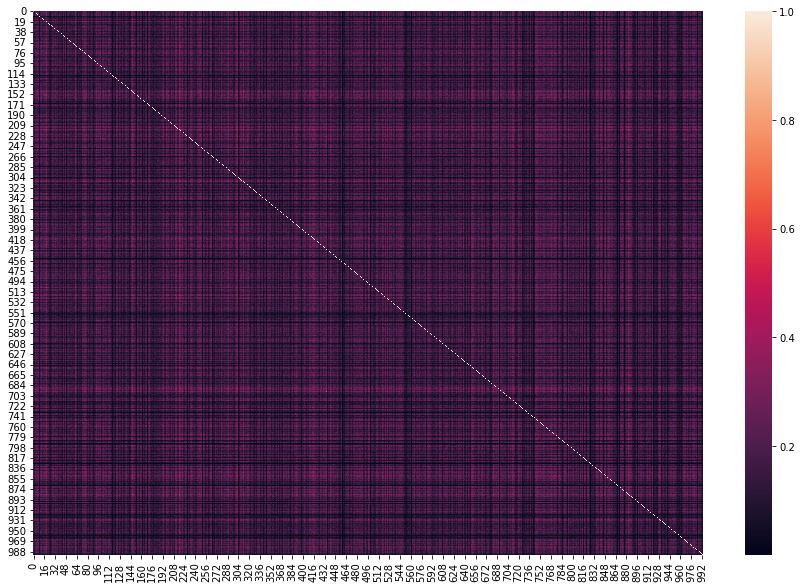

In [202]:
plt.figure(figsize=(15, 10))
sns.heatmap(K_rbf)
plt.show()

In [203]:
# K_sig = pairwise_kernels(X, metric='sigmoid')

In [204]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(K_sig)
# plt.show()

In [205]:
K = K_rbf

In [206]:
# plt.figure(figsize=(15, 10))
# sns.heatmap(B @ B.T)
# plt.show()

In [185]:
BBK = B @ B.T @ K

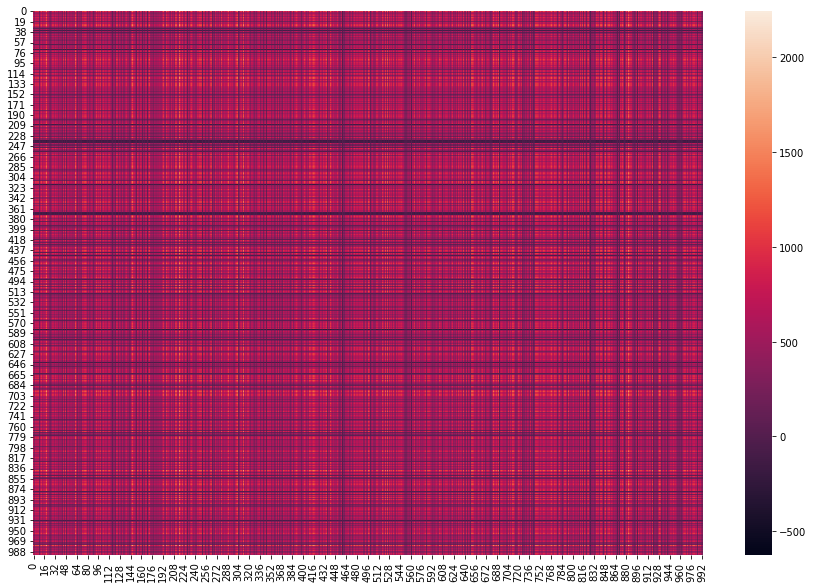

In [186]:
plt.figure(figsize=(15, 10))
sns.heatmap(BBK)
plt.show()

In [187]:
M = K + C*np.identity(K.shape[0]) + D * BBK

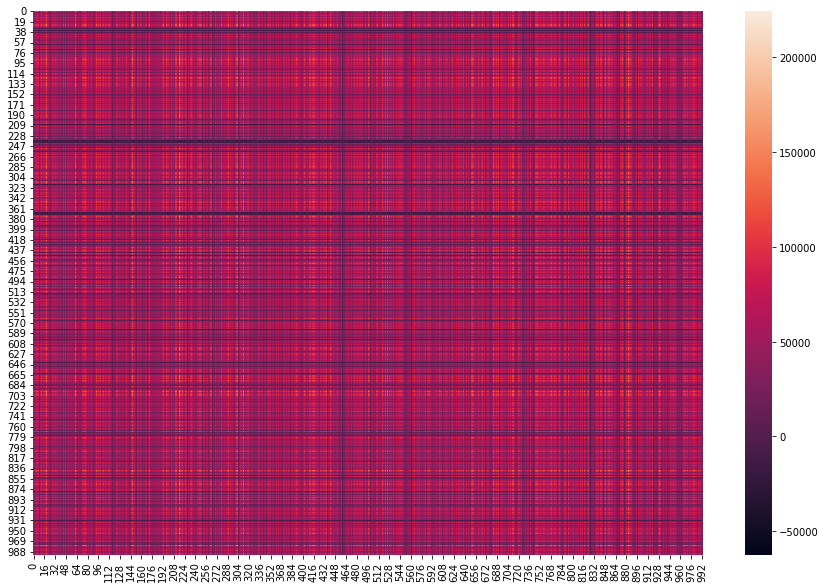

In [188]:
plt.figure(figsize=(15, 10))
sns.heatmap(M)
plt.show()

In [189]:
dual_coef = np.linalg.solve(M, y)

In [192]:
dual_coef.shape

(994,)

In [208]:
X.shape

(994, 160)

In [159]:
B.shape

(994, 85)

In [160]:
# Predict:
Xp = X

In [161]:
Kp = pairwise_kernels(Xp, X, metric='rbf')

In [162]:
yp = Kp @ dual_coef

In [163]:
yp.shape

(994,)

In [164]:
exp_vec = (B.T @ yp)

In [165]:
exp = np.dot(exp_vec, exp_vec)
exp

6.084233924008596e-06

In [166]:
mse = np.dot(y - yp, y - yp)
mse

0.12341655527612273

In [167]:
ridge = dual_coef @ Kp @ dual_coef
ridge

2.6487485461401463

In [168]:
import scipy

In [169]:
scipy.stats.spearmanr(y, yp)[0]

0.9279549222951606